# **build the simplest possible autoencoder**

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


Using TensorFlow backend.


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
autoencoder_input (InputLaye (None, 784)               0         
_________________________________________________________________
autoencoder_encoded (Dense)  (None, 32)                25120     
_________________________________________________________________
autoencoder_decoded (Dense)  (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


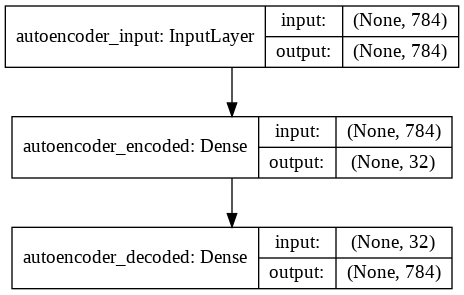

In [6]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,),name = 'autoencoder_input')
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu',name = 'autoencoder_encoded')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid',name = 'autoencoder_decoded')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded,name = 'autoencoder')
autoencoder.summary()
plot_model(autoencoder,show_shapes=True,show_layer_names=True)

## **Let's also create a separate encoder model:**

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
autoencoder_input (InputLaye (None, 784)               0         
_________________________________________________________________
autoencoder_encoded (Dense)  (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


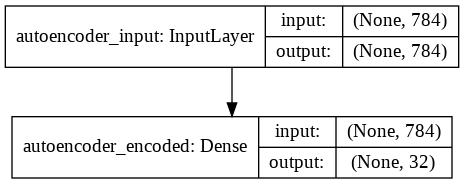

In [13]:
# this model maps an input to its encoded representation
encoder = Model(input_img,encoded)
encoder.summary()
plot_model(encoder,show_shapes=True,show_layer_names=True)

**as well as decoder**

In [14]:
# create a placeholder for an encoded (32-dimensional) input
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32)                0         
_________________________________________________________________
autoencoder_decoded (Dense)  (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


## **Now let's train our autoencoder to reconstruct MNIST digits.**

**First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:**

In [5]:

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


**Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).**

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

**We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.**

In [3]:
print(x_train.shape)
print(len(x_train))
print('==========')
print(x_test.shape)
print(len(x_test))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


In [4]:
print(x_train.shape[1:])
temp = np.prod(x_train.shape[1:])
print(temp)

(28, 28)
784


In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


## **Now let's train our autoencoder for 50 epochs:**

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.3722 - val_loss: 0.2723
Epoch 2/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.2657 - val_loss: 0.2556
Epoch 3/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.2444 - val_loss: 0.2307
Epoch 4/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.2222 - val_loss: 0.2117
Epoch 5/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.2066 - val_loss: 0.1992
Epoch 6/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1959 - val_loss: 0.1900
Epoch 7/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1879 - val_loss: 0.1830
Epoch 8/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1812 - val_loss: 0.1767
Epoch 9/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1752 - val_loss: 0.1710
Epoch

**After 50 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.11 we can try to visualize the reconstructed inputs and the encoded representations.We will use Matplotlib**

In [11]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
autoencoder_input (InputLaye (None, 784)               0         
_________________________________________________________________
autoencoder_encoded (Dense)  (None, 32)                25120     
_________________________________________________________________
autoencoder_decoded (Dense)  (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [12]:
enocded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(enocded_imgs)

In [13]:
print(type(x_test))
print(x_test.shape)
print('================')
print(type(enocded_imgs))
print(enocded_imgs.shape)
print('================')
print(type(decoded_imgs))
print(decoded_imgs.shape)

<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 32)
<class 'numpy.ndarray'>
(10000, 784)


**Here's what we get. The top row is the original digits,and the bottom row is the reconstructed digits. We are losing quite a bit of detail with this basic approach**

In [6]:
# use Matplotlib
def plot_results(x_test,decoded_imgs): 
    import matplotlib.pyplot as plt
    # how many digits we will display
    n = 10 
    plt.figure(figsize=(20,4))

    for i in range(n):
        # display original
        ax = plt.subplot(2,n,i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2,n,i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


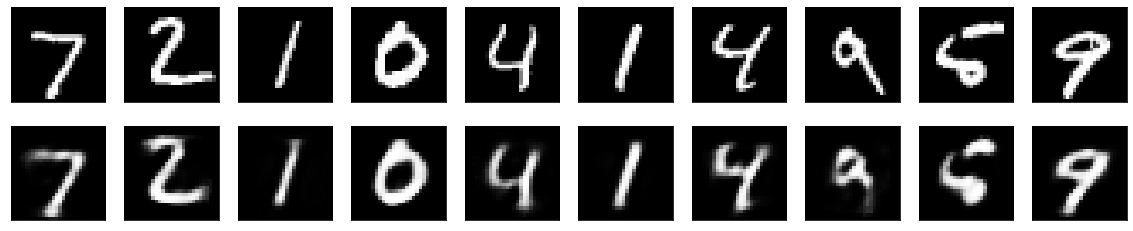

In [15]:
plot_results(x_test,decoded_imgs)

# **Adding a sparisity constraint on the encoded representations**

**In the previous example, the representations were only constrained by the size of the hidden layer(32). In such a situation, what typically happens is that the hidden layer is learning an approximation of PCA. But another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would 'fires' at a given time. In keras, this can be done by adding an 'activity_regularizer' to our Dense Layer**

In [16]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [17]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.6737 - val_loss: 0.6485
Epoch 2/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.4531 - val_loss: 0.4

## **create encoder and decoder**

In [18]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


In [19]:
print(type(x_test))
print(x_test.shape)
print('================')
print(type(enocded_imgs))
print(enocded_imgs.shape)
print('================')
print(type(decoded_imgs))
print(decoded_imgs.shape)

<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 32)
<class 'numpy.ndarray'>
(10000, 784)


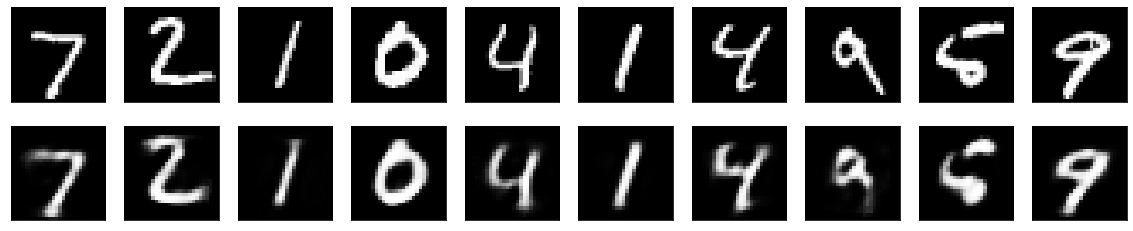

In [20]:
plot_results(x_test,decoded_imgs)

# **Deep autoencoder**

**we do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers, such as:**

In [4]:
# input_img = Input(shape=(784,))
# encoded = Dense(128, activation = 'relu', name = 'encoded_input')(input_img)
# encoded = Dense(64, activation = 'relu')(encoded)
# encded = Dense(32, activation = 'relu', name = 'encoded_end')(encoded)

# decoded = Dense(64, activation = 'relu',name = 'decoded_begin')(encoded)
# decoded = Dense(128, activation = 'relu')(decoded)
# decoded = Dense(784, activation = 'sigmoid',name = 'decoded_end')(decoded)



input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu', name = 'encoded_input')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu',name = 'encoded_end')(encoded)

decoded = Dense(64, activation='relu',name = 'decoded_begin')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid',name = 'decoded_end')(decoded)

In [15]:
autoencoder = Model(input_img, decoded)
autoencoder.summary()
#plot_model(autoencoder,show_shapes=True,show_layer_names=True)


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
encoded_input (Dense)        (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
encoded_end (Dense)          (None, 32)                2080      
_________________________________________________________________
decoded_begin (Dense)        (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
decoded_end (Dense)          (None, 784)               1011

In [6]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
encoded_input (Dense)        (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
encoded_end (Dense)          (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [17]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(32,),name = 'encoded_input')
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
print(decoder_layer)
print(autoencoder.layers[-1])

In [19]:

#ouput = decoder_layer(encoded_input)
autoencoder.outputs = [autoencoder.get_layer('decoded_end').output]
features = autoencoder(encoded_input)
# create the decoder model
decoder = Model(encoded_input,output =[features] )

ValueError: ignored

In [23]:
autoencoder.compile(optimizer='adadelta',loss = 'binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.3294 - val_loss: 0.2640
Epoch 2/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2552 - val_loss: 0.2448
Epoch 3/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2342 - val_loss: 0.2211
Epoch 4/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2102 - val_loss: 0.1983
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1933 - val_loss: 0.1865
Epoch 6/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1829 - val_loss: 0.1759
Epoch 7/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1736 - val_loss: 0.1696
Epoch 8/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1667 - val_loss: 0.1622
Epoch 9/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1605 - val_loss: 0.1

<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 32)
<class 'numpy.ndarray'>
(10000, 784)


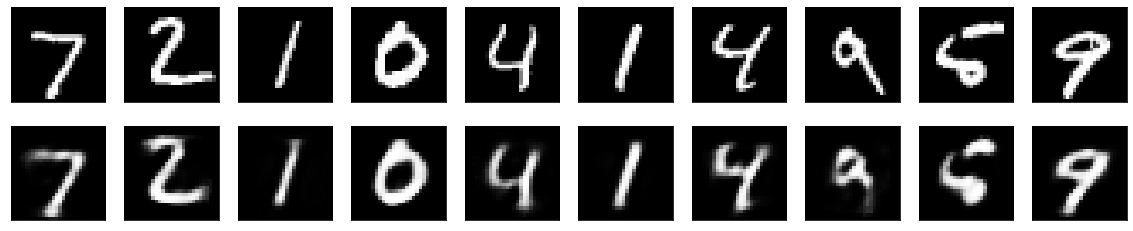

In [24]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
print(type(x_test))
print(x_test.shape)
print('================')
print(type(enocded_imgs))
print(enocded_imgs.shape)
print('================')
print(type(decoded_imgs))
print(decoded_imgs.shape)
plot_results(x_test,decoded_imgs)